### Importing packages

In [105]:
import numpy as np
import pandas as pd
import re

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import FreqDist
from nltk import word_tokenize

### Importing data from csv

In [106]:
df = pd.read_csv('Hotel_Reviews.csv')

In [107]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [108]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

### Creating new dataframe with negative reviews only

In [109]:
# Remove the columns
rev = df.drop(columns=['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score', 'Hotel_Name',
                       'Reviewer_Nationality', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts',
                       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags', 
                       'days_since_review', 'lat', 'lng'], axis=1)
# Print out the first rows of papers
rev.head()

,Negative_Review,Review_Total_Negative_Word_Counts
0,I am so angry that i made this post available...,397
1,No Negative,0
2,Rooms are nice but for elderly a bit difficul...,42
3,My room was dirty and I was afraid to walk ba...,210
4,You When I booked with your company on line y...,140


In [110]:
rev.shape

(515738, 2)

### Removing rows with No negative reviews

In [111]:
indexNames = rev[rev['Negative_Review'] == 'No Negative' ].index
 
# Delete these row indexes from dataFrame
rev.drop(indexNames , inplace=True)

In [112]:
rev.shape

(387848, 2)

In [113]:
rev['Negative_Review']

0          I am so angry that i made this post available...
2          Rooms are nice but for elderly a bit difficul...
3          My room was dirty and I was afraid to walk ba...
4          You When I booked with your company on line y...
5          Backyard of the hotel is total mess shouldn t...
                                ...                        
515731     No parking Public parking garage is 15 Euro p...
515733     no trolly or staff to help you take the lugga...
515734             The hotel looks like 3 but surely not 4 
515735     The ac was useless It was a hot week in vienn...
515737         I was in 3rd floor It didn t work Free Wife 
Name: Negative_Review, Length: 387848, dtype: object

### Writing functions for data cleaning part

In [417]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s))

# Get all the stop words in the English language
def stopwords(docu):
    from nltk.corpus import stopwords
    stopwords_list = stopwords.words('english')
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    docu = word_tokenize(docu)
    words_s = [word for word in docu if word not in stopwords_list]
    words_s = listToString(words_s)
    return words_s

# Lemmatize list of words and join

def lemmatize_stemming(docu):
    short = []
    text = word_tokenize(docu)
    for word in text:
        short.append(SnowballStemmer('english').stem(WordNetLemmatizer().lemmatize(word)))
    short = listToString(short)
    return short

In [418]:
rev['Negative_Review']

0         angri made post avail via possibl site use pla...
2         room nice elder  difficult room two stori narr...
3         room dirti afraid walk barefoot floor look cle...
4         book compani line show pictur room thought get...
5               backyard hotel total mess happen hotel star
                                ...                        
515731               park public park garag 15 euro per day
515733                   trolli staff help take luggag room
515734                                 hotel look like sure
515735              ac useless hot week vienna gave hot air
515737                             3rd floor work free wife
Name: Negative_Review, Length: 387848, dtype: object

### Removing punctuation, stopwords. Lemmatizing and converting words to lowercase.

In [117]:
# Remove punctuation
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: x.lower())
# Remove stopwords
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: stopwords(x))
# Stemming and Lemmatizing
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: lemmatize_stemming(x))

# Print out the first rows of papers
rev['Negative_Review'].head()

<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
<ipython-input-117-5f820b23ffd5>:2: DeprecationWarning: invalid escape sequence \.
  rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: re.sub('[,\.!?]', '', x))


0    angri made post avail via possibl site use pla...
2    room nice elder bit difficult room two stori n...
3    room dirti afraid walk barefoot floor look cle...
4    book compani line show pictur room thought get...
5          backyard hotel total mess happen hotel star
Name: Negative_Review, dtype: object

### Removing irrelevant words

In [138]:
# Unifing and removing some unnecessary words and phrases that don't bring information to analysis
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: x.replace('bit', ''))
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: x.replace('little', 'small'))
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: x.replace('small room', 'room small'))
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: x.replace('quite', ''))

### Creating wordcloud

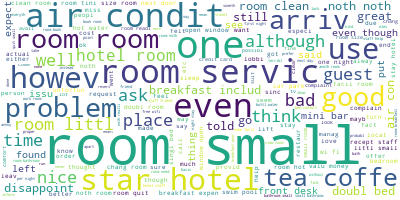

In [139]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed reviews together.
long_string = ','.join(list(rev['Negative_Review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Creating chart of Most frequent words

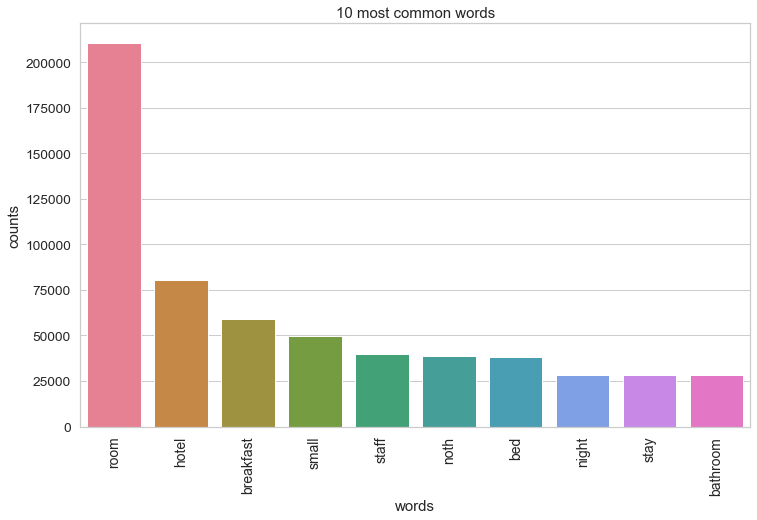

In [416]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(12, 12/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90, fontsize=14) 
    plt.xlabel('words', fontsize=14)
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(rev['Negative_Review'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### Creating long string (combining all the reviews)

In [141]:
long_string[0:1000]

'angri made post avail via possibl site use plane trip one make mistak book place made book via book com stay night hotel 11 17 juli upon arriv place room small 2nd floor hotel turn room book special reserv level duplex room would big window high ceil room ok mind broken window close hello rain mini fridg contain sort bio weapon least guess smell intim ask chang room explain time book duplex btw cost simpl doubl got way volum due high ceil offer room next day check next day 11 clock order get room wane best way begin holiday wait till 13 00 order check new room wonder waist time room 023 got want peac intern garden view big window tire wait room place belong rush citi even turn constant nois room guess made vibrat vent tube someth constant annoy hell stop even make hard fall asleep wife audio record attach want send via e mail next day technician came abl determin caus disturb sound offer chang room hotel fulli book room left one smaller seem newer,room nice elder  difficult room two s

### Creating tokens

In [142]:
stri = word_tokenize(long_string)

### Removing stopwords, punctuation and digits from long string

In [144]:
from nltk.corpus import stopwords
import string

# Get all the stop words in the English language
stopwords_list = stopwords.words('english')

# It is generally a good idea to also remove punctuation

# Now we have a list that includes all english stopwords, as well as all punctuation
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


words_stopped = [word for word in stri if word not in stopwords_list]

### Most frequent words

In [145]:
freqdist = FreqDist(words_stopped)
freqdist.most_common(30)

[('room', 210663),
 ('hotel', 80419),
 ('breakfast', 59158),
 ('small', 49894),
 ('staff', 39946),
 ('noth', 38588),
 ('bed', 38054),
 ('would', 32282),
 ('could', 32076),
 ('one', 28977),
 ('night', 28420),
 ('stay', 28045),
 ('bathroom', 28035),
 ('like', 26202),
 ('book', 24611),
 ('time', 23785),
 ('work', 23512),
 ('get', 23019),
 ('littl', 22527),
 ('shower', 22410),
 ('check', 21794),
 ('u', 21202),
 ('servic', 21000),
 ('good', 20929),
 ('day', 20775),
 ('need', 20575),
 ('bar', 19949),
 ('price', 19849),
 ('even', 19764),
 ('ask', 17608)]

### Lemmatizing corpus

In [146]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Lemmatize list of words and join
words_lemmatized = ' '.join([lemmatizer.lemmatize(w) for w in words_stopped])

In [147]:
words_lemmatized = word_tokenize(words_lemmatized)

In [148]:
freqdist = FreqDist(words_lemmatized)
freqdist.most_common(30)

[('room', 210800),
 ('hotel', 80433),
 ('breakfast', 59224),
 ('small', 49904),
 ('staff', 39968),
 ('noth', 38723),
 ('bed', 38071),
 ('would', 32291),
 ('could', 32078),
 ('one', 28981),
 ('night', 28420),
 ('bathroom', 28054),
 ('stay', 28046),
 ('like', 26212),
 ('book', 24613),
 ('time', 23787),
 ('work', 23513),
 ('get', 23022),
 ('littl', 22539),
 ('shower', 22421),
 ('check', 21801),
 ('u', 21299),
 ('servic', 21004),
 ('good', 20938),
 ('day', 20775),
 ('need', 20581),
 ('bar', 19956),
 ('price', 19864),
 ('even', 19764),
 ('ask', 17612)]

### Normalizing word frequency

In [149]:
total_word_count = sum(freqdist.values())
top_50_words = freqdist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in top_50_words:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
room 			 0.04695
hotel 			 0.01791
breakfast 			 0.01319
small 			 0.01111
staff 			 0.008901
noth 			 0.008624
bed 			 0.008479
would 			 0.007192
could 			 0.007144
one 			 0.006454
night 			 0.00633
bathroom 			 0.006248
stay 			 0.006246
like 			 0.005838
book 			 0.005482
time 			 0.005298
work 			 0.005237
get 			 0.005127
littl 			 0.00502
shower 			 0.004993
check 			 0.004855
u 			 0.004744
servic 			 0.004678
good 			 0.004663
day 			 0.004627
need 			 0.004584
bar 			 0.004444
price 			 0.004424
even 			 0.004402
ask 			 0.003922
poor 			 0.003808
expens 			 0.003729
recept 			 0.003723
floor 			 0.003713
realli 			 0.003684
clean 			 0.003669
also 			 0.003667
door 			 0.003465
window 			 0.003408
use 			 0.00336
water 			 0.0032
noisi 			 0.003106
air 			 0.002964
locat 			 0.002922
coffe 			 0.002877
go 			 0.002863
wifi 			 0.00281
restaur 			 0.002795
nois 			 0.002792
park 			 0.002777


### Creating Bigrams

In [406]:
import nltk
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
rev_finder = BigramCollocationFinder.from_words(words_lemmatized)
rev_biscored = rev_finder.score_ngrams(bigram_measures.raw_freq)
rev_biscored[:50]

[(('room', 'small'), 0.004785878218341078),
 (('room', 'servic'), 0.0014812637177247202),
 (('air', 'condit'), 0.001447634064833962),
 (('star', 'hotel'), 0.0011685747597205843),
 (('book', 'com'), 0.001024924917902445),
 (('tea', 'coffe'), 0.0008926334356699261),
 (('room', 'room'), 0.0008494271266579586),
 (('room', 'littl'), 0.0007708094612908219),
 (('hotel', 'room'), 0.0007556649818433282),
 (('air', 'con'), 0.0007106769693669496),
 (('breakfast', 'includ'), 0.0007046637201745624),
 (('room', 'clean'), 0.0006884056760618118),
 (('doubl', 'bed'), 0.0006832832786016301),
 (('even', 'though'), 0.000663239114627006),
 (('breakfast', 'room'), 0.0006596757076981839),
 (('front', 'desk'), 0.000650321764510026),
 (('noth', 'noth'), 0.0006445312282506901),
 (('could', 'better'), 0.0006429722377193304),
 (('would', 'like'), 0.0006169148245523192),
 (('mini', 'bar'), 0.0006100107236277264),
 (('would', 'nice'), 0.0006068927425650071),
 (('breakfast', 'expens'), 0.000573931228473403),
 (('dou

In [412]:
bigram = pd.DataFrame(rev_biscored, columns=['Bigram', 'Frequecy'])

In [413]:
bigram[0:40]

,Bigram,Frequecy
0,"(room, small)",0.004786
1,"(room, servic)",0.001481
2,"(air, condit)",0.001448
3,"(star, hotel)",0.001169
4,"(book, com)",0.001025
5,"(tea, coffe)",0.000893
6,"(room, room)",0.000849
7,"(room, littl)",0.000771
8,"(hotel, room)",0.000756
9,"(air, con)",0.000711


### Creating Bigram frequency table for presentation

In [414]:
bigram.iloc[[0,1,2,5,9,10,11,15,21,23,25,27,28,32]]

,Bigram,Frequecy
0,"(room, small)",0.004786
1,"(room, servic)",0.001481
2,"(air, condit)",0.001448
5,"(tea, coffe)",0.000893
9,"(air, con)",0.000711
10,"(breakfast, includ)",0.000705
11,"(room, clean)",0.000688
15,"(front, desk)",0.000650
21,"(breakfast, expens)",0.000574
23,"(could, hear)",0.000555


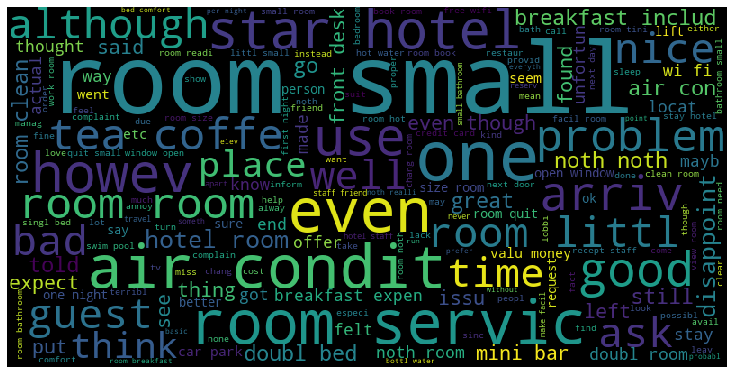

In [421]:
# Bigrams wordcloud

wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(long_string_bi)

plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

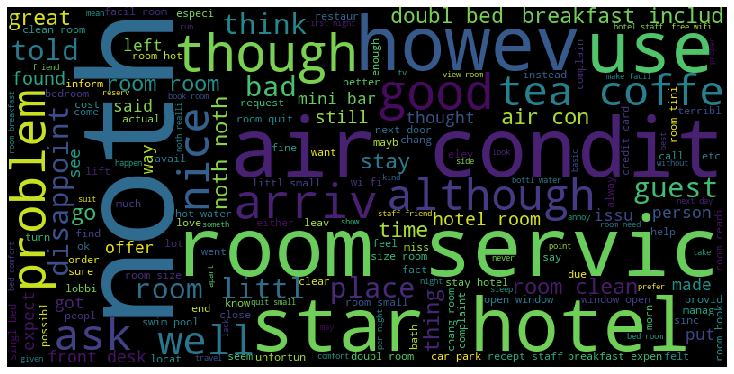

In [224]:
# Bigrams wordcloud
long_string_bi2 = long_string_bi.replace('room small', '')
long_string_bi2 = long_string_bi2.replace('one noth', '')
long_string_bi2 = long_string_bi2.replace('one', '')
long_string_bi2 = long_string_bi2.replace('even', '')
wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(long_string_bi2)

plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

### Creating trigrams

In [225]:
from nltk import ngrams

# n = 3
# trigrams = list(ngrams(words_lemmatized, n))

#trigrams[0:100]

trigram_measures = nltk.collocations.TrigramAssocMeasures()
rev_trifinder = TrigramCollocationFinder.from_words(words_lemmatized)
rev_triscored = rev_trifinder.score_ngrams(trigram_measures.raw_freq)
rev_triscored[:50]

[(('room', 'littl', 'small'), 0.0003166977907990606),
 (('room', 'quit', 'small'), 0.00023518485730225598),
 (('room', 'small', 'room'), 0.00022315835891748153),
 (('coffe', 'make', 'facil'), 0.00022004037785476222),
 (('room', 'room', 'small'), 0.0002149179803945805),
 (('make', 'facil', 'room'), 0.00020890473120219327),
 (('air', 'condit', 'work'), 0.0002035596208089602),
 (('tea', 'coffe', 'make'), 0.00019999621388013813),
 (('small', 'room', 'small'), 0.00016413943165886614),
 (('noth', 'room', 'small'), 0.0001625804411275065),
 (('tea', 'coffe', 'facil'), 0.0001614668764622496),
 (('two', 'singl', 'bed'), 0.0001592397471317358),
 (('air', 'condit', 'room'), 0.00014008643488931725),
 (('room', 'small', 'bathroom'), 0.0001351867503621869),
 (('breakfast', 'includ', 'price'), 0.0001342958986299814),
 (('tea', 'coffe', 'room'), 0.0001267236589062345),
 (('four', 'star', 'hotel'), 0.00012427381664266933),
 (('breakfast', 'could', 'better'), 0.00012405110370961798),
 (('room', 'small', 

### Creating Quadgrams

In [154]:
n = 4
quadgrams = list(ngrams(words_lemmatized, n))

quadgram_measures = nltk.collocations.QuadgramAssocMeasures()
rev_quadfinder = QuadgramCollocationFinder.from_words(words_lemmatized)
rev_quadscored = rev_quadfinder.score_ngrams(quadgram_measures.raw_freq)
rev_quadscored[:50]

[(('tea', 'coffe', 'make', 'facil'), 0.00018195646630297645),
 (('coffe', 'make', 'facil', 'room'), 0.00013919558315711174),
 (('tea', 'coffe', 'facil', 'room'), 9.688012587734976e-05),
 (('room', 'small', 'room', 'small'), 9.665741294429838e-05),
 (('singl', 'bed', 'push', 'togeth'), 7.349526790695499e-05),
 (('tea', 'make', 'facil', 'room'), 6.102334365607778e-05),
 (('two', 'singl', 'bed', 'push'), 4.209274434671059e-05),
 (('doubl', 'bed', 'two', 'singl'), 3.518864342211784e-05),
 (('two', 'singl', 'push', 'togeth'), 3.496593048906647e-05),
 (('room', 'littl', 'small', 'side'), 3.429779168991233e-05),
 (('wall', 'thin', 'could', 'hear'), 2.9620820095833376e-05),
 (('coffe', 'tea', 'make', 'facil'), 2.895268129667924e-05),
 (('breakfast', 'includ', 'room', 'rate'), 2.6057413167011314e-05),
 (('room', 'two', 'singl', 'bed'), 2.6057413167011314e-05),
 (('air', 'condit', 'work', 'room'), 2.5834700233959938e-05),
 (('air', 'condit', 'work', 'proper'), 2.3162145037343392e-05),
 (('bed', 

In [399]:
quadgram = pd.DataFrame(rev_quadscored, columns=['Quadgram', 'Frequecy'])

In [400]:
quadgram[40:60]

,Quadgram,Frequecy
40,"(room, hot, air, con)",0.000016
41,"(breakfast, includ, price, room)",0.000016
42,"(room, small, small, bed)",0.000016
43,"(littl, far, citi, center)",0.000016
44,"(room, could, littl, bigger)",0.000016
45,"(room, tea, coffe, make)",0.000016
46,"(iron, iron, board, room)",0.000015
47,"(noth, room, littl, small)",0.000015
48,"(room, small, bathroom, small)",0.000015
49,"(room, small, noth, room)",0.000015


### Creating Quadgram frequency table for presentation

In [401]:
quadgram.iloc[[0,3,4,6,10,12,15,18,23,35,36,46]]

,Quadgram,Frequecy
0,"(tea, coffe, make, facil)",0.000182
3,"(room, small, room, small)",0.000097
4,"(singl, bed, push, togeth)",0.000073
6,"(two, singl, bed, push)",0.000042
10,"(wall, thin, could, hear)",0.000030
12,"(breakfast, includ, room, rate)",0.000026
15,"(air, condit, work, proper)",0.000023
18,"(room, air, condit, work)",0.000022
23,"(far, away, citi, center)",0.000020
35,"(open, window, fresh, air)",0.000017


In [155]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Preparing data for topic modeling (TF-IDF)

In [158]:
docs = rev['Negative_Review']

count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

cv_data = count_vectorizer.fit_transform(docs)
tfidf_data = tfidf_vectorizer.fit_transform(docs)

cv_data = count_vectorizer.fit_transform(docs)
tfidf_data = tfidf_vectorizer.fit_transform(docs)

### Creating functions for topics

In [159]:
# def functions for topic modelings
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def display_topics2(model, feature_names, no_top_words=10, topic_names = None):
    for index, topic in enumerate(model.components_):
        if not topic_names or not topic_names[index]:
            print(f"\nTopic {index}")
        else:
            print(f"\nTopic {topic_names[index]}:")
        msg = ", ".join([f'{feature_names[i]} ({topic[i]:6.4f})' 
                             for i in topic.argsort()[:-no_top_words-1:-1]])
        print(msg)

In [422]:
n_comp = 7
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [161]:
# topic modeling with lsa and tfidf
display_topics2(lsa_tfidf, tfidf_vectorizer.get_feature_names(),8)


Topic 0
room small (0.9988), small bathroom (0.0121), room small bathroom (0.0109), small bed (0.0107), room small bed (0.0096), room small price (0.0082), small price (0.0080), size room (0.0079)

Topic 1
air condit (0.7368), breakfast expens (0.6429), condit work (0.0782), air condit work (0.0781), room servic (0.0584), condit room (0.0540), air condit room (0.0539), room littl (0.0434)

Topic 2
breakfast expens (0.7629), price breakfast (0.0172), breakfast expens euro (0.0100), noth realli (0.0092), expens euro (0.0091), expens offer (0.0075), noth like (0.0072), room size (0.0068)

Topic 3
noth like (0.9969), like everyth (0.0347), room servic (0.0314), noth like hotel (0.0275), like hotel (0.0258), mini bar (0.0157), absolut noth (0.0154), room littl (0.0094)

Topic 4
room littl (0.6949), littl small (0.5218), room littl small (0.4654), room servic (0.0870), size room (0.0431), breakfast room (0.0274), littl tire (0.0254), room littl tire (0.0246)

Topic 5
room servic (0.9671), b

In [162]:
from __future__ import print_function

In [163]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [164]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [279]:
data_raw = list(rev['Negative_Review'])

### Convert to document-term matrix
Next, the raw documents are converted into document-term matrix, possibly as raw counts or in TF-IDF form.

In [167]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(data_raw)
print(dtm_tf.shape)

(387848, 6629)


In [168]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(data_raw)
print(dtm_tfidf.shape)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


(387848, 6629)


### Fit Latent Dirichlet Allocation models
Finally, the LDA models are fitted.

In [193]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

### Visualizing the models with pyLDAvis¶

In [194]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
#pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.011844 -0.134565       1        1  15.106503
5     -0.020671 -0.183272       2        1  14.921090
7     -0.119705  0.047398       3        1  13.029887
6     -0.150634  0.162635       4        1  11.901111
0     -0.129071  0.149734       5        1   9.335394
4      0.039393 -0.185111       6        1   8.995263
1      0.004714  0.031070       7        1   8.622900
2      0.042944 -0.101773       8        1   8.121056
3     -0.069942  0.068261       9        1   5.995605
8      0.414816  0.145623      10        1   3.971190, topic_info=     Category           Freq       Term          Total  loglift  logprob
679   Default   58430.000000  breakfast   58430.000000  30.0000  30.0000
3838  Default   39496.000000       noth   39496.000000  29.0000  29.0000
4834  Default  208255.000000       room  208255.000000  28.0000  28.0000
491   Default   39537.000000        bed   39537.000000  27.0000  27.0000
5236  Default   48974.000000      small   48974.000000  26.0000  26.0000
...       ...            ...        ...            ...      ...      ...
2492  Topic10    1977.657262       good   20992.851692   0.8638  -4.3445
5478  Topic10    2186.446289       stay   28209.683078   0.6687  -4.2441
2789  Topic10    2796.381428      hotel   80997.802533  -0.1400  -3.9981
2040  Topic10    1061.511787     experi    4444.911204   1.7940  -4.9667
5827  Topic10    1117.805738      think    6881.379495   1.4087  -4.9150

[707 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
7         2  0.997747   abrupt
10        1  0.166847  absolut
10        2  0.148140  absolut
10        3  0.006067  absolut
10        4  0.060672  absolut
...     ...       ...      ...
6580      6  0.038560    worth
6580      7  0.945807    worth
6580      8  0.005861    worth
6580      9  0.000308    worth
6608      5  0.973889     yoga

[2261 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 8, 7, 1, 5, 2, 3, 4, 9])

### Experimented with different number of topics and came up with the following most relevant topics:

1. Internet related issues. Words: book, wifi, internet, connect
2. Staff, desk, reception related issues. Words: staff, recept, help, servic, rude, desk, custom, welcom, receptionist
3. Noise, Hear, Outside, Sound, Light, bad sleep. Words: noisi, nois, hear, sound, outside, loud, street, light
4. Bathroom, toilet, sink, broken, towel, Shower, hair. Words: bathroom, shower, bath, toilet, sink, hair, water
5. Facilities, coffee, cup, kettle, decor, room small, tea, old, machine. Words: facil, decor, furnitur, kettl, fridg, renov, cup, machin, old
6. Food related issues. Words: breakfast, food, restaur, menu, egg, buffet, cook, coffe, fruit, dinner, meal, eat
7. Price/Value issues. Words: price, high, money, valu, worth, paid, expens, rate
8. Location related issues. Words: locat, far, walk, citi, area, station, taxi, centr, away, metro, train, close, tram, bus, public, transport, distanc
9. Bed comfort issues. Words: bed, doubl, pillow, singl, uncomfort, mattress, twin, soft, togeth, sheet, sofa, king, firm, blanket, queen, push, comfi, linen
10. GYM, Suana, Pool. Words: pool, spa, swim, sauna, gym, jacuzzi

In [425]:
rev[rev['Negative_Review'].str.contains('noisi' or 'nois' or 'hear' or 'sound' 
                                        or 'outside' or 'loud' or 'street')].head()

,Negative_Review,Review_Total_Negative_Word_Counts,Internet_related_issues,Staff_related_issues,Noise_related_issues,Bathroom_related_issues,Facilities_related_issues,Food_related_issues,PriceValue_related_issues,Location_related_issues,BedComfort_related_issues,GYM_Sauna_Pool,Total
3,room dirti afraid walk barefoot floor look cle...,210,0,1,1,0,0,0,1,0,1,0,3
21,room overr disast room 231 dirti smelli hot no...,92,0,0,1,1,0,0,0,0,0,0,1
40,sever part build outsid construct moment get r...,63,0,0,1,0,0,0,0,1,0,0,1
57,build work carri stay noisi obvious unavoid st...,46,0,0,1,0,0,0,0,0,0,0,0
63,bad attitud personnel breakfast allow one coff...,38,0,0,1,0,0,1,0,0,0,0,1


### Creating columns in dataframe for each row with dummy variables associated with each topic

In [255]:
rev['Internet_related_issues'] = np.where(rev.apply(lambda row: row.astype(str).str.contains('wifi' or 'internet' or 'connect').any(), axis=1), 1, 0)
rev['Staff_related_issues'] = np.where(rev.apply(lambda row: row.astype(str).str.contains('staff' or 'personnel' or 'recept' or 'help' or 'servic' or 'rude' or 'desk' or 'custom' or 'receptionist').any(), axis=1), 1, 0)
rev['Noise_related_issues'] = np.where(rev.apply(lambda row: row.astype(str).str.contains('noisi' or 'nois' or 'hear' or 'sound' or 'outside' or 'loud' or 'street').any(), axis=1), 1, 0)
rev['Bathroom_related_issues'] = np.where(rev.apply(lambda row: row.astype(str).str.contains('bathroom' or 'shower' or 'bath' or 'toilet' or 'sink' or 'hair' or 'water').any(), axis=1), 1, 0)
rev['Facilities_related_issues'] = np.where(rev.apply(lambda row: row.astype(str).str.contains('facil' or 'decor' or 'furnitur' or 'kettl' or 'fridg' or 'renov' or 'cup' or 'machin' or 'old').any(), axis=1), 1, 0)
rev['Food_related_issues'] = np.where(rev.apply(lambda row: row.astype(str).str.contains('breakfast' or 'brekfast' or 'food' or 'restaur' or 'menu' or 'egg' or 'buffet' or 'cook' or 'coffe' or 'fruit' or 'dinner' or 'meal' or 'eat').any(), axis=1), 1, 0)
rev['PriceValue_related_issues'] = np.where(rev.apply(lambda row: row.astype(str).str.contains('price' or 'high' or 'money' or 'valu' or 'worth' or 'paid' or 'expens' or 'rate').any(), axis=1), 1, 0)
rev['Location_related_issues'] = np.where(rev.apply(lambda row: row.astype(str).str.contains('locat' or 'far' or 'walk' or 'citi' or 'area' or 'station' or 'taxi' or 'centr' or 'away' or 'metro' or 'train' or 'close' or 'tram' or 'bus' or 'public' or 'transport' or 'distanc').any(), axis=1), 1, 0)
rev['BedComfort_related_issues'] = np.where(rev.apply(lambda row: row.astype(str).str.contains('bed' or 'doubl' or 'pillow' or 'singl' or 'uncomfort' or 'mattress' or 'twin' or 'soft' or 'togeth' or 'sheet' or 'sofa' or 'king' or 'firm' or 'blanket' or 'queen' or 'push' or 'comfi' or 'linen').any(), axis=1), 1, 0)
rev['GYM_Sauna_Pool'] = np.where(rev.apply(lambda row: row.astype(str).str.contains('pool' or 'spa' or 'swim' or 'sauna' or 'gym' or 'jacuzzi').any(), axis=1), 1, 0)


In [349]:
columns1 = list(rev.columns)
cols = columns1[2:]
cols

['Internet_related_issues',
 'Staff_related_issues',
 'Noise_related_issues',
 'Bathroom_related_issues',
 'Facilities_related_issues',
 'Food_related_issues',
 'PriceValue_related_issues',
 'Location_related_issues',
 'BedComfort_related_issues',
 'GYM_Sauna_Pool',
 'Total']

In [328]:
#rev.loc[rev['Location_related_issues']==1]

In [427]:
#rev_c = rev.drop(columns=['Review_Total_Negative_Word_Counts'], axis=1)
rev_c = rev
print(rev_c.shape)
rev_c[cols].head()

(387848, 13)


,Internet_related_issues,Staff_related_issues,Noise_related_issues,Bathroom_related_issues,Facilities_related_issues,Food_related_issues,PriceValue_related_issues,Location_related_issues,BedComfort_related_issues,GYM_Sauna_Pool,Total
0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,0,1,0,3
4,0,1,0,0,0,0,1,0,0,0,2
5,0,0,0,0,0,0,0,0,0,0,0


### Creating new column with count of topics for each review

In [350]:
rev_c['Total'] = (rev_c['Internet_related_issues']+rev_c['Staff_related_issues']+rev_c['Bathroom_related_issues']
                  +rev_c['Facilities_related_issues']+rev_c['Food_related_issues']+rev_c['PriceValue_related_issues']
                  +rev_c['Location_related_issues']+rev_c['BedComfort_related_issues']+rev_c['GYM_Sauna_Pool'])
rev_c.head()

,Negative_Review,Review_Total_Negative_Word_Counts,Internet_related_issues,Staff_related_issues,Noise_related_issues,Bathroom_related_issues,Facilities_related_issues,Food_related_issues,PriceValue_related_issues,Location_related_issues,BedComfort_related_issues,GYM_Sauna_Pool,Total
0,angri made post avail via possibl site use pla...,397,0,0,0,0,0,0,0,0,0,0,0
2,room nice elder difficult room two stori narr...,42,0,0,0,0,0,0,0,0,0,0,0
3,room dirti afraid walk barefoot floor look cle...,210,0,1,1,0,0,0,1,0,1,0,3
4,book compani line show pictur room thought get...,140,0,1,0,0,0,0,1,0,0,0,2
5,backyard hotel total mess happen hotel star,17,0,0,0,0,0,0,0,0,0,0,0


In [355]:
#rev_c.loc[rev_c['Total']>=1]

### Checking share of classified reviews

In [433]:
print(f'{round((161378/387848*100),2)}%')

41.61%


In [434]:
unclass = rev_c.loc[rev_c['Total']==0]

In [436]:
unclass_rev = list(unclass['Negative_Review'])
unclass_rev[0:6]

['angri made post avail via possibl site use plane trip one make mistak book place made book via book com stay night hotel 11 17 juli upon arriv place room small 2nd floor hotel turn room book special reserv level duplex room would big window high ceil room ok mind broken window close hello rain mini fridg contain sort bio weapon least guess smell intim ask chang room explain time book duplex btw cost simpl doubl got way volum due high ceil offer room next day check next day 11 clock order get room wane best way begin holiday wait till 13 00 order check new room wonder waist time room 023 got want peac intern garden view big window tire wait room place belong rush citi even turn constant nois room guess made vibrat vent tube someth constant annoy hell stop even make hard fall asleep wife audio record attach want send via e mail next day technician came abl determin caus disturb sound offer chang room hotel fulli book room left one smaller seem newer',
 'room nice elder  difficult room 

### Checking number of reviews that go to each category of issues

In [437]:
print(rev['Internet_related_issues'].value_counts())
print(rev['Staff_related_issues'].value_counts())
print(rev['Noise_related_issues'].value_counts())
print(rev['Bathroom_related_issues'].value_counts())
print(rev['Facilities_related_issues'].value_counts())
print(rev['Food_related_issues'].value_counts())
print(rev['PriceValue_related_issues'].value_counts())
print(rev['Location_related_issues'].value_counts())
print(rev['BedComfort_related_issues'].value_counts())
print(rev['GYM_Sauna_Pool'].value_counts())

0    376255
1     11593
Name: Internet_related_issues, dtype: int64
0    353338
1     34510
Name: Staff_related_issues, dtype: int64
0    374222
1     13626
Name: Noise_related_issues, dtype: int64
0    362149
1     25699
Name: Bathroom_related_issues, dtype: int64
0    378253
1      9595
Name: Facilities_related_issues, dtype: int64
0    337742
1     50106
Name: Food_related_issues, dtype: int64
0    367623
1     20225
Name: PriceValue_related_issues, dtype: int64
0    375249
1     12599
Name: Location_related_issues, dtype: int64
0    351790
1     36058
Name: BedComfort_related_issues, dtype: int64
0    380825
1      7023
Name: GYM_Sauna_Pool, dtype: int64


For example, an LDA model might have topics that can be classified as CAT_related and DOG_related. A topic has probabilities of generating various words, such as milk, meow, and kitten, which can be classified and interpreted by the viewer as "CAT_related". Naturally, the word cat itself will have high probability given this topic. The DOG_related topic likewise has probabilities of generating each word: puppy, bark, and bone might have high probability. Words without special relevance, such as "the" (see function word), will have roughly even probability between classes (or can be placed into a separate category). A topic is neither semantically nor epistemologically strongly defined. It is identified on the basis of automatic detection of the likelihood of term co-occurrence. A lexical word may occur in several topics with a different probability, however, with a different typical set of neighboring words in each topic.

Each document is assumed to be characterized by a particular set of topics. This is similar to the standard bag of words model assumption, and makes the individual words exchangeable.

Potential problem classes:

1. Location
2. Value (Price)
3. Cleanliness
4. Ammenities, Facilities
5. Hotel personnal 

1. Build Bigrams chart
2. Combine topics
3. Remove most frequant word and see
4. Random samples to see how the model classify topics

